In [1]:
#Import essential libraries
import matplotlib.pyplot as plt
import numpy as np
#Paralel computing 
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()-2
from scipy.ndimage import gaussian_filter1d


In [5]:
from src.typy import fd

In [6]:
from src import typy

In [7]:
#Define data size
nk = 500*500
nq = 500
q_path = np.arange(nq)
nph = 9

In [8]:
outfolder="results_GMKG/"

In [7]:
#Data folder
work_dir = "/work/bansil/s.sevim/0_NbSe2_Work/0.00565/"


In [9]:
epw = typy.epw(work_dir=work_dir,outfolder=outfolder)

In [10]:
epw.nk=nk

In [11]:
epw.load_data()

In [12]:
ph = epw.ph
g_abs = epw.g_abs
g_complex = epw.g_complex
e_k = epw.e_k
e_kq = epw.e_kq

In [13]:
#Band symmetry points
sym, path = typy.path_create(nq,np.array([[0.0,0.0,0.0],[0.0,0.5,0.0],[1/3,1/3,0],[0.0,0.0,0.0]]))

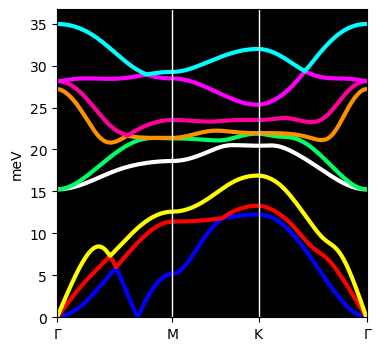

In [14]:
#Untangled band
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
for i in sym[1:-1]:
    plt.axvline(i,c='white',lw=1)
plt.ylabel(r"meV")
# plt.title(r"$\Omega$")
plt.show()

In [15]:
ph_xs =typy.ph_cross(ph,tolerance=0.13)
temp_ph = typy.untangle(ph,ph_xs)

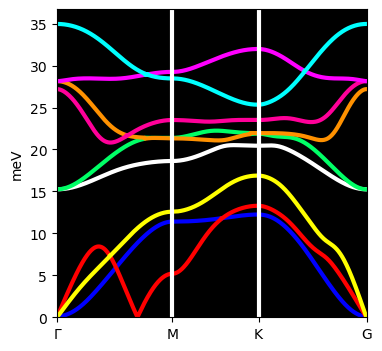

In [16]:
#Untangled band
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(temp_ph[i],label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.ylabel(r"meV")
# plt.legend()
# plt.title(r"$\Omega$")
plt.show()

In [17]:
temp_g_complex = typy.untangle(g_complex,ph_xs)

In [18]:
temp_g_complex_mean = (temp_g_complex*temp_g_complex.conj()).mean(axis=2)

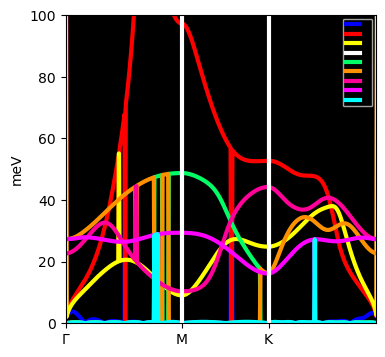

In [19]:
sq = np.sqrt(temp_g_complex_mean.real)
# sq = temp_g_complex_mean.real
fig = plt.figure(figsize=(4,4))
for i in range(0,9):
    plt.plot(sq[i].real,label=i)
plt.xlim(0,nq)
plt.ylabel(r"meV")
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.ylim(0,100)
plt.legend(fontsize=5)
plt.xlim(0,nq-3)
plt.show()

In [20]:
g_xs = typy.g_cross(sq,tolerance = 30,offset=50)

In [21]:
sq1 = typy.untangle(sq,g_xs)

In [22]:
g_xs2 = typy.g_cross(sq1,tolerance = 10,offset=50)

In [23]:
sq2 = typy.untangle(sq1,g_xs2)

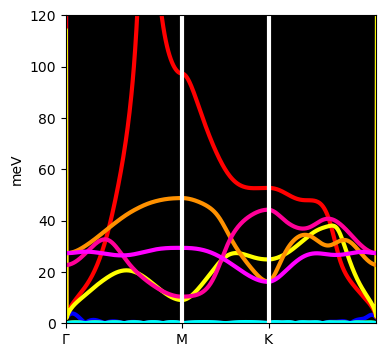

In [24]:
fig = plt.figure(figsize=(4,4))
for i in range(9):
    plt.plot(sq2.real[i],label=i)
plt.xlim(0,nq)
plt.ylabel(r"meV")
plt.xticks(sym,["Γ","M","K","Γ"])
for i in sym[1:-1]:
    plt.axvline(i,c='white')
# plt.legend()
plt.ylim(0,120)
plt.xlim(0,nq-3)
plt.show()

In [25]:
temp_ph1 = typy.untangle(temp_ph,g_xs)
fixed_ph = typy.untangle(temp_ph1,g_xs2)
epw.ph = fixed_ph

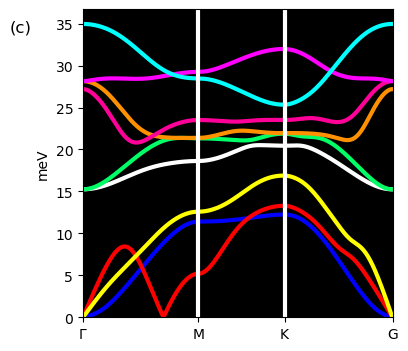

In [122]:
#Untangled band
fig = plt.figure(figsize=(4,4))
ax = plt.axes()
for i in range(nph):
    plt.plot(epw.ph[i],label=i,)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='white',lw=3)
plt.title('(c)', x=-0.20,y=0.9)

plt.ylabel(r"meV")
# plt.title(r"$\Omega$")

plt.savefig('./outdata/500_GMKG/phonon.png',bbox_inches='tight')
plt.show()

In [27]:
temp_g_complex  = typy.untangle(g_complex,ph_xs)
temp_g_complex1 = typy.untangle(temp_g_complex,g_xs)
fixed_g_complex = typy.untangle(temp_g_complex1,g_xs2)

In [28]:
epw.g_complex = fixed_g_complex

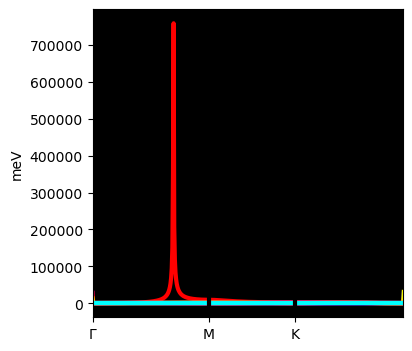

In [29]:
fig = plt.figure(figsize=(4,4))
# plt.savefig('./outdata/500_GMKG/phonon.png',bbox_inches='tight')
for i in range(9):
    plt.plot((epw.g_complex*epw.g_complex.conj()).mean(axis=2).real[i],label=i)
plt.xlim(0,nq)
plt.ylabel(r"meV")
plt.xticks(sym,["Γ","M","K","Γ"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
# plt.legend()
# plt.ylim(0,10000)
plt.xlim(0,nq-3)
plt.show()

In [30]:
reduced_fixed_g_complex = fixed_g_complex.copy()
for i in range(nph):
    for j in range(nq):
        reduced_fixed_g_complex[i][j]*=np.sqrt(fixed_ph[i][j])

In [31]:
epw.g0 = reduced_fixed_g_complex

In [32]:
g0_mean = (epw.g0*epw.g0.conj()).mean(axis=2)

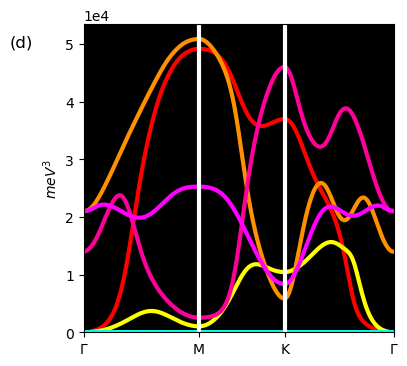

In [123]:
fig = plt.figure(figsize=(4,4))


for i in range(nph):
    plt.plot(g0_mean[i].real,label=i,lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.ylabel(r"${meV}^{3}$")
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.savefig("./output/G.jpg",bbox_inches='tight')
for i in sym[1:-1]:
    plt.axvline(i,c='white')
# plt.legend()
# plt.title(r"$\sum_{k} {g_{k,k+q} \cdot g^{\star}_{k,k+q}}$")
# plt.savefig('outdata/1001_GMKG/g_mean.png',bbox_inches='tight')
plt.title('(d)', x=-0.20,y=0.9)
plt.savefig('./outdata/500_GMKG/g_mean.png',bbox_inches='tight')
plt.show()

In [34]:
#ff00d2

In [35]:
def calculate_suscep(e_k,e_kq,nph,nq,nk,delta=0.0000001):
    res = np.zeros(shape=(nph,nq),dtype=complex)
    for q in range(nq):
        for n in range(nph):
            temp_res = 0 
            for k in range(nk):
                top = typy.fd(e_k[q][k]-ef)-typy.fd(e_kq[q][k]-ef)
                bottom = e_k[q][k]-e_kq[q][k]-1j*delta-ph[n][q]*10**-3
                temp_res += top/bottom
            res[n][q]=temp_res/nk  
    return res

In [36]:
# suscep = calculate_suscep(epw.e_k,e_kq,9,500,128*128)

In [35]:
class gkk:
    def __init__(self,e_k,e_kq,ef,g,ph,nph,nq,nk,delta=0.000001,T=1,U=False):
        self.e_k = e_k
        self.e_kq = e_kq
        self.nph = nph
        self.nq = nq
        self.ef = ef
        self.U=U
        self.nk=nk
        if type(ph) == int:
            self.ph = np.zeros(shape=(self.nph,self.nq))
        else:
            self.ph = ph
        self.g = g
        self.g_conj = self.g.conj()
        self.delta = delta
        self.T =T
        
    def calculate_suscep(self,q):
        top = typy.fd(self.e_k[q]-self.ef,T=self.T)-typy.fd(self.e_kq[q]-self.ef,T=self.T)
        bottom = self.e_k[q]-self.e_kq[q]-1j*self.delta
        temp_res = top/bottom
        res = temp_res.mean()
        return res
        
    def calculate_selfen(self,q):
        res = np.zeros(self.nph,dtype=complex)
        for n in range(self.nph):
            temp_res = 0 
            top = typy.fd(self.e_k[q]-self.ef,T=self.T)-typy.fd(self.e_kq[q]-self.ef,T=self.T)
            bottom = self.e_k[q]-self.e_kq[q]-1j*self.delta-self.ph[n][q]*10**-3
            suscep = top/bottom
            if self.U:
                suscep=suscep/(1-self.U*suscep)
            eph = self.g[n][q]*self.g_conj[n][q]*10**-9
            temp_res = eph*suscep
            res[n]=temp_res.mean()
        return res
        

In [ ]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=epw.ef,ph=epw.ph,nph=nph,nq=nq,nk=nk)
res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
filter_self = gaussian_filter1d(-np.array(res).T.real,2)
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(filter_self[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\Omega)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.show()


In [ ]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=0,nph=nph,nq=nq,nk=nk)
res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
filter_self = gaussian_filter1d(-np.array(res).T.real,2)
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(filter_self[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.show()


In [71]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=epw.ef,ph=0,nph=nph,nq=nq,nk=nk)
res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))


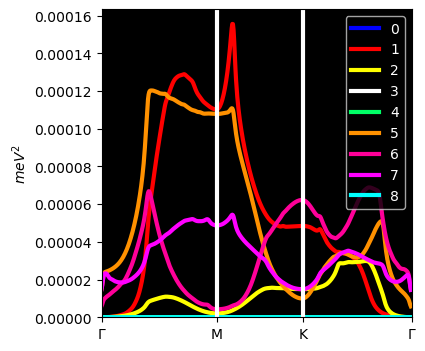

In [78]:
filter_self = gaussian_filter1d(-np.array(res).T.real,2)
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(filter_self[i],lw=3,label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
# plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.legend(labelcolor='w')
plt.show()


In [79]:
big_peak = np.argmax(filter_self[1])
small_peak = np.argmax(filter_self[1][:big_peak-50])

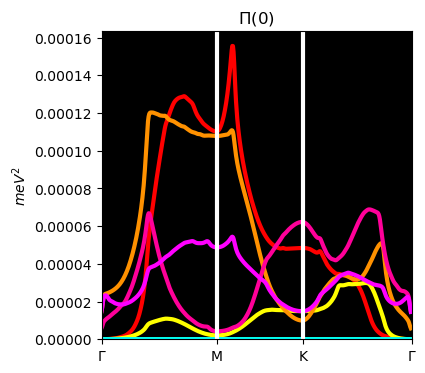

In [84]:
fig = plt.figure(figsize=(4,4))

for i in range(nph):
    plt.plot(filter_self[i],lw=3,label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='white')
# plt.axvline(big_peak,c='white')
# plt.axvline(small_peak,c='white')
# plt.axvline(big_peak,c='red',linestyle='--')
# plt.axvline(small_peak,c='red',linestyle='--')
# plt.legend()
# plt.savefig('./outdata/500_GMKG/selfen.png',bbox_inches='tight')
plt.show()

In [332]:
# res_array=np.zeros(shape=(len(parameter_search),nph,nq))
# for j,i in enumerate(parameter_search):
#     gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=0,nph=nph,nq=nq,nk=nk,U=i)
#     temp_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
#     res_array[j] = -np.array(temp_res).T.real
#     print(f"{j}/{len(parameter_search)}")

In [333]:
parameter_search

array([-0.2 , -0.15, -0.1 , -0.05, -0.  ,  0.05,  0.1 ,  0.15,  0.2 ])

In [ ]:
# %%time
# q_res = np.zeros(nq,dtype=complex)
# for i in range(nq):
#     q_res[i]=np.mean((typy.fd(epw.e_k[i]-epw.ef,T=1)-typy.fd(epw.e_kq[i]-epw.ef,T=1))/(epw.e_k[i]-epw.e_kq[i]-1j*1e-8))

In [51]:
# %%time
# ef_search = np.arange(-0.1,0.25,0.05).round(4)
ef_search=[-0.1,0,0.1]
suscep_ef=np.zeros(shape=(len(ef_search),nq))
for j,i in enumerate(ef_search):
    gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=epw.ef+i,ph=0,nph=nph,nq=nq,nk=nk,T=1)
    temp_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_suscep)(i) for i in range(nq))
    suscep_ef[j] = -np.array(temp_res).real
    print(f"{j}/{len(ef_search)}")

0/3
1/3
2/3


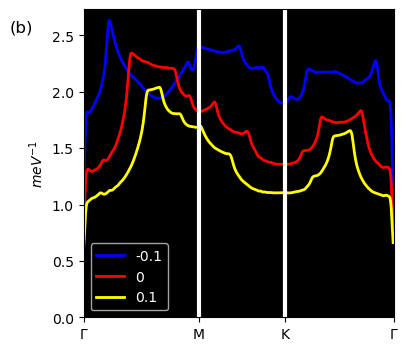

In [119]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i,j in enumerate(suscep_ef):
    plt.plot(gaussian_filter1d(j,2),lw=2,label=ef_search[i])
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{-1}$")
# plt.title(r"$\chi(\epsilon)$")
plt.title('(b)', x=-0.20,y=0.9)
plt.legend(labelcolor='white')
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.savefig('outdata/500_GMKG/chi.png',bbox_inches='tight')

plt.show()

In [57]:
import pandas as pd

In [61]:
fs = pd.DataFrame()
fs['x']=mmm[0]
fs['y']=mmm[1]
fs['k']=epw.e_k[0] - epw.ef
fs = fs.query(f" -0.02  <= k -{0} <= 0.02 ")

In [66]:
fs.x.values

array([0.        , 0.        , 0.        , ..., 0.86602505, 0.86602505,
       0.86602505])

In [72]:
suscep_ef

array([[-0.        ,  1.90380473,  1.88998471, ...,  1.8929122 ,
         1.88896431, -0.        ],
       [-0.        ,  1.35402034,  1.33486566, ...,  1.2985359 ,
         1.29501114, -0.        ],
       [-0.        ,  1.01020586,  1.02961096, ...,  1.05912106,
         1.06100273, -0.        ]])

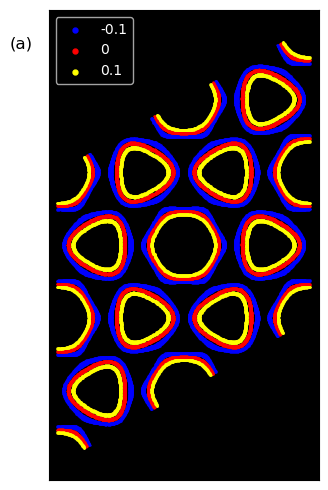

In [116]:
fig = plt.figure(figsize=(3,5))
for i in ef_search:
    fs = pd.DataFrame()
    fs['x']=mmm[0]
    fs['y']=mmm[1]
    fs['k']=epw.e_k[0] - epw.ef
    fs = fs.query(f" -0.02  <= k -{i} <= 0.02 ")
    plt.scatter(fs.x.values,fs.y.values,s=0.5,label=i)
plt.legend(labelcolor='white',markerscale=5)

# plt.arrow(mmm.T[big_k][0],mmm.T[big_k][1],big_arrow[0],big_arrow[1]-1,lw=3,color='b')
# plt.arrow(mmm.T[small_k][0],mmm.T[small_k][1],small_arrow[0],small_arrow[1]-1,lw=3,color='r')

# plt.title("gkk big peak")
# plt.scatter(0.05191997,0.5)
# plt.scatter(0.14925482+0.05191997, 0.61523046-0.5)
# plt.scatter(0.14925482, 0.61523046)
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
plt.title('(a)', x=-0.1,y=0.9)
plt.savefig('./outdata/500_GMKG/fs.png',bbox_inches='tight')
plt.show()

In [ ]:
##### 

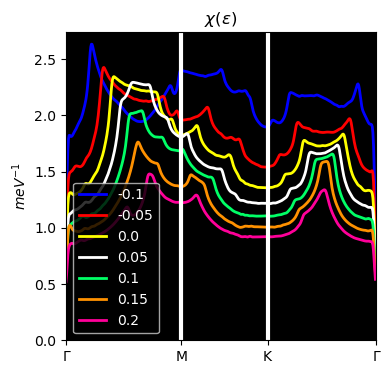

In [48]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i,j in enumerate(suscep_ef):
    plt.plot(gaussian_filter1d(j,2),lw=2,label=ef_search[i])
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{-1}$")
plt.title(r"$\chi(\epsilon)$")
plt.legend(labelcolor='white')
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.savefig('outdata/500_GMKG/chi_ef.png',bbox_inches='tight')

plt.show()

In [52]:
# parameter_search = np.arange(0.04,0.07,0.01).round(4)
selfen_ef=np.zeros(shape=(len(ef_search),nph,nq))
for j,i in enumerate(ef_search):
    gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=epw.ef+i,ph=0,nph=nph,nq=nq,nk=nk,T=1)
    temp_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
    selfen_ef[j] = -np.array(temp_res).T.real
    print(f"{j}/{len(ef_search)}")

0/7
1/7
2/7
3/7
4/7
5/7
6/7


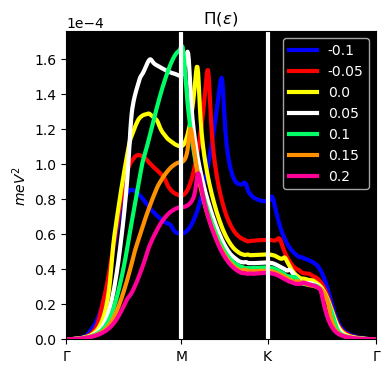

In [169]:
# plt.plot(filtered_suscep,c='r')
fig = plt.figure(figsize=(4,4))
for i,j in enumerate(selfen_ef):
    # for i in range(nph):
    # plt.plot(-np.array(selfen_res).T[i].real)
    plt.plot(gaussian_filter1d(j[1],2),lw=3,label=ef_search[i])
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\epsilon)$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.legend(labelcolor='white')
plt.savefig('outdata/500_GMKG/pi_ef.png',bbox_inches='tight')

plt.show()

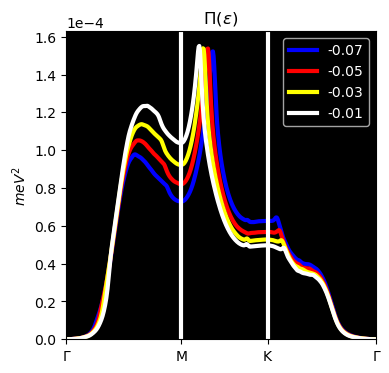

In [62]:
# plt.plot(filtered_suscep,c='r')
fig = plt.figure(figsize=(4,4))
for i,j in enumerate(selfen_array):
    # for i in range(nph):
    # plt.plot(-np.array(selfen_res).T[i].real)
    plt.plot(gaussian_filter1d(j[1],2),lw=3,label=parameter_search[i])
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\epsilon)$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.legend(labelcolor='white')
# plt.savefig('outdata/1001_GMKG/pi_omega.png',bbox_inches='tight')

plt.show()

In [42]:
temp_search = [0.1,1,10,100]
selfen_T=np.zeros(shape=(len(temp_search),nph,nq))
for j,i in enumerate(temp_search):
    gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=epw.ef,ph=0,nph=nph,nq=nq,nk=nk,T=i)
    temp_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
    selfen_T[j] = -np.array(temp_res).T.real
    print(f"{j}/{len(temp_search)}")

/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/bansil/s.sevim/Work/typy/src/typy.py:160: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
/work/ba

0/4
1/4
2/4
3/4


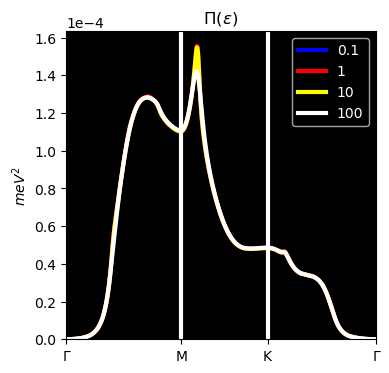

In [179]:
# plt.plot(filtered_suscep,c='r')
fig = plt.figure(figsize=(4,4))
for i,j in enumerate(selfen_T):
    # for i in range(nph):
    # plt.plot(-np.array(selfen_res).T[i].real)
    plt.plot(gaussian_filter1d(j[1],2),lw=3,label=temp_search[i])
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\epsilon)$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
for i in sym[1:-1]:
    plt.axvline(i,c='white')
plt.legend(labelcolor='white')
# plt.savefig('outdata/1001_GMKG/pi_omega.png',bbox_inches='tight')

plt.show()

In [55]:
me = (typy.mesh_cartesian(500).T-0.5)*2
m_x,m_y = me

In [61]:
me.T

array([[-1.        , -1.        ],
       [-1.        , -0.99599198],
       [-1.        , -0.99198397],
       ...,
       [ 1.        ,  0.99198397],
       [ 1.        ,  0.99599198],
       [ 1.        ,  1.        ]])

In [40]:
# with open("/work/bansil/s.sevim/0_spaces/gamma_2_300.mesh", 'w') as file:
#     file.write(f"{len(me.T)} crystal \n")
#     for i in me.T:
#       file.write(f"{i[0]} {i[1]} {0} {1/len(me.T)} \n")

In [124]:
abs = (epw.g0*epw.g0.conj()).real

In [48]:
mmm = typy.mesh_crystal(500)

## Show nesting vectors

In [92]:
G=[0.0,0.0,0.0]
M=[0,1/2,0]
K=[1/3,1/3,0]
corners=np.array([G,M,K,G])

In [111]:
points,path = typy.path_create(500,corners)
path = path.T[:2].T

In [165]:
small_arrow = np.dot(path[small_peak],typy.g_vec)

In [166]:
big_arrow = np.dot(path[big_peak],typy.g_vec)

In [156]:
small_suscep

array([1.05482981, 1.0562314 , 1.05847972, ..., 1.0552662 , 1.05445001,
       1.05482981], dtype=float128)

In [172]:
small_k = np.argmax(small_suscep*abs[1][small_peak])

In [180]:
big_k = np.argmax(big_suscep*abs[1][big_peak])

In [160]:
mmm.T[big_k]

array([0.07462741, 0.30761523])

In [137]:
big_arrow

array([0.05191997, 0.5       ])

In [145]:
typy.g_vec

array([[0.86602505, 0.5       ],
       [0.        , 1.        ]])

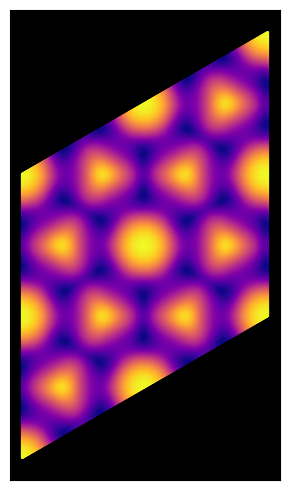

In [50]:
fig = plt.figure(figsize=(3,5))
plt.scatter(mmm[0],mmm[1],c=epw.e_kq[0],cmap='plasma',s=1)
# plt.arrow(mmm.T[big_k][0],mmm.T[big_k][1],big_arrow[0],big_arrow[1]-1,lw=3,color='b')
# plt.arrow(mmm.T[small_k][0],mmm.T[small_k][1],small_arrow[0],small_arrow[1]-1,lw=3,color='r')

# plt.title("gkk big peak")
# plt.scatter(0.05191997,0.5)
# plt.scatter(0.14925482+0.05191997, 0.61523046-0.5)
# plt.scatter(0.14925482, 0.61523046)
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
# plt.savefig('./outdata/500_GMKG/electron.png',bbox_inches='tight')
plt.show()

In [ ]:
abs[1][big_peak]

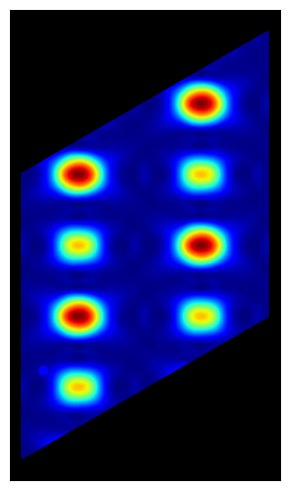

In [161]:
fig = plt.figure(figsize=(3,5))
# plt.scatter(mmm[0],mmm[1],c=epw.e_kq[0],cmap='jet',s=1)
plt.scatter(mmm[0],mmm[1],c=abs[1][big_peak],cmap='jet',s=1)
plt.scatter(mmm.T[big_k][0],mmm.T[big_k][1])
# plt.title("gkk big peak")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
# plt.savefig('./outdata/500_GMKG/gkk_big_peak.png',bbox_inches='tight')

plt.show()

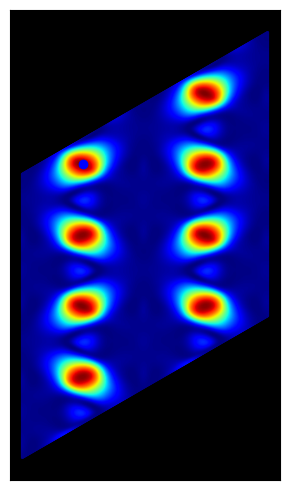

In [150]:
fig = plt.figure(figsize=(3,5))
plt.scatter(mmm[0],mmm[1],c=abs[1][small_peak],cmap='jet',s=1)
plt.scatter(mmm.T[small_k][0],mmm.T[small_k][1])
# plt.title("gkk small peak")

# plt.title("gkk big peak")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
plt.savefig('./outdata/500_GMKG/gkk_small_peak.png',bbox_inches='tight')

plt.show()

In [153]:
i=small_peak
q_res=(typy.fd(epw.e_k[i]-epw.ef,T=1)-typy.fd(epw.e_kq[i]-epw.ef,T=1))/(epw.e_k[i]-epw.e_kq[i]-1j*1e-8)
qqq = -q_res.real
small_suscep = np.where(qqq < 100,qqq, 100)

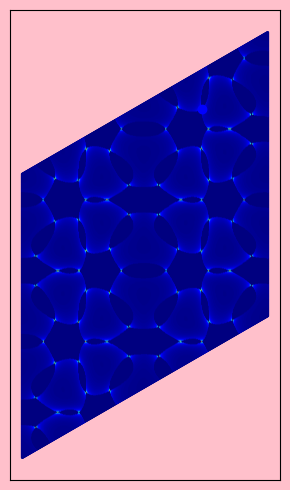

In [175]:
fig = plt.figure(figsize=(3,5))
fig.set_facecolor('pink')
ax = plt.axes()
ax.set_facecolor("pink")
plt.scatter(mmm[0],mmm[1],c=small_suscep,cmap='jet',s=1)
# plt.title("suscep small peak")
plt.scatter(mmm.T[small_k][0],mmm.T[small_k][1])

# plt.title("gkk big peak")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
plt.savefig('./outdata/500_GMKG/suscep_small_peak.png',bbox_inches='tight')

plt.show()

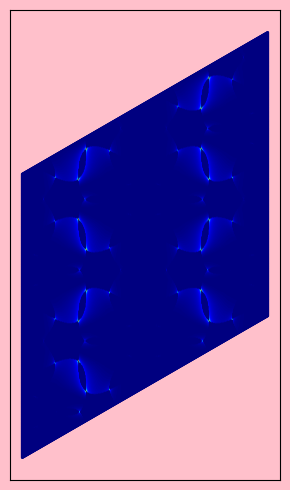

In [224]:
fig = plt.figure(figsize=(3,5))
fig.set_facecolor('pink')
ax = plt.axes()
ax.set_facecolor("pink")
plt.scatter(mmm[0],mmm[1],c=small_suscep*abs[1][small_peak],cmap='jet',s=1)
# plt.title(r"G $\chi$ small peak")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
plt.savefig('./outdata/500_GMKG/gchi_small_peak.png',bbox_inches='tight')

plt.show()

In [154]:
i=big_peak
q_res=(typy.fd(epw.e_k[i]-epw.ef,T=1)-typy.fd(epw.e_kq[i]-epw.ef,T=1))/(epw.e_k[i]-epw.e_kq[i]-1j*1e-8)
qqq = -q_res.real
big_suscep = np.where(qqq < 100,qqq, 100)

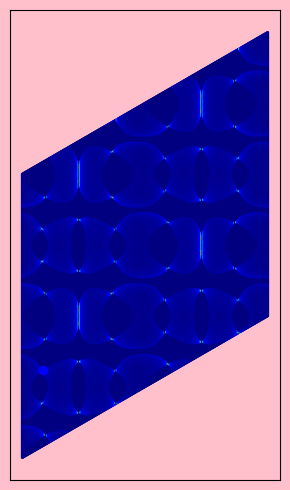

In [164]:
fig = plt.figure(figsize=(3,5))
fig.set_facecolor('pink')
ax = plt.axes()
ax.set_facecolor("pink")
plt.scatter(mmm[0],mmm[1],c=big_suscep,cmap='jet',s=1)
# plt.title("suscep big q")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.tight_layout()
# plt.savefig('./outdata/500_GMKG/suscep_big_peak.png',bbox_inches='tight')

plt.show()

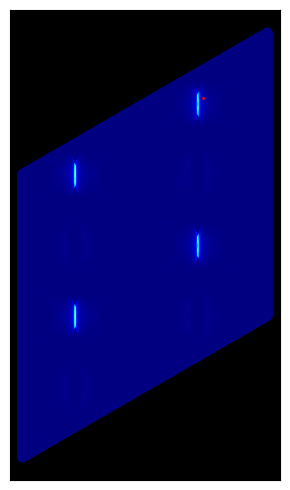

In [185]:
fig = plt.figure(figsize=(3,5))

plt.scatter(mmm[0],mmm[1],c=big_suscep*abs[1][big_peak],cmap='jet')
plt.scatter(mmm.T[big_k][0],mmm.T[big_k][1],c='red',s=1)

# plt.title(r"G $\chi$ big peak")
plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.savefig('./outdata/500_GMKG/gchi_big_peak.png',bbox_inches='tight')
plt.tight_layout()
plt.show()

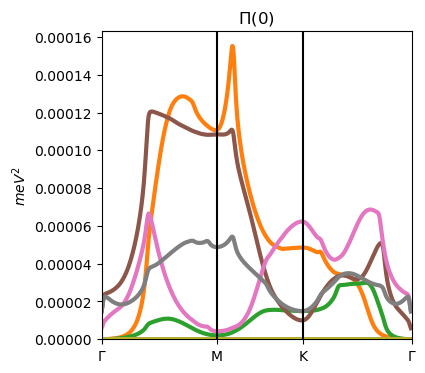

In [173]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=0,nph=nph,nq=nq,nk=nk)
res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
filter_self = gaussian_filter1d(-np.array(res).T.real,2)
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(filter_self[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.show()


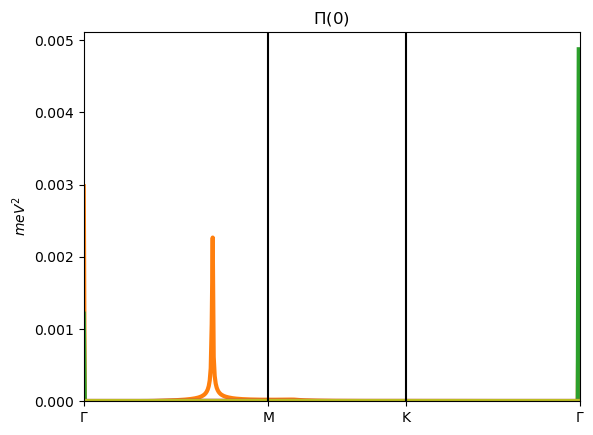

In [174]:
for i in range(nph):
    plt.plot(filter_self[i]/epw.ph[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.show()


In [238]:
max(epw.e_k-epw.ef

array([[0.60250873, 0.60138612, 0.60018838, ..., 0.60370659, 0.60334667,
        0.60250873],
       [0.60250873, 0.60138612, 0.60018838, ..., 0.60370659, 0.60334667,
        0.60250873],
       [0.60250873, 0.60138612, 0.60018838, ..., 0.60370659, 0.60334667,
        0.60250873],
       ...,
       [0.60250873, 0.60138612, 0.60018838, ..., 0.60370659, 0.60334667,
        0.60250873],
       [0.60250873, 0.60138612, 0.60018838, ..., 0.60370659, 0.60334667,
        0.60250873],
       [0.60250873, 0.60138612, 0.60018838, ..., 0.60370659, 0.60334667,
        0.60250873]])

In [237]:
epw.ef

1.126

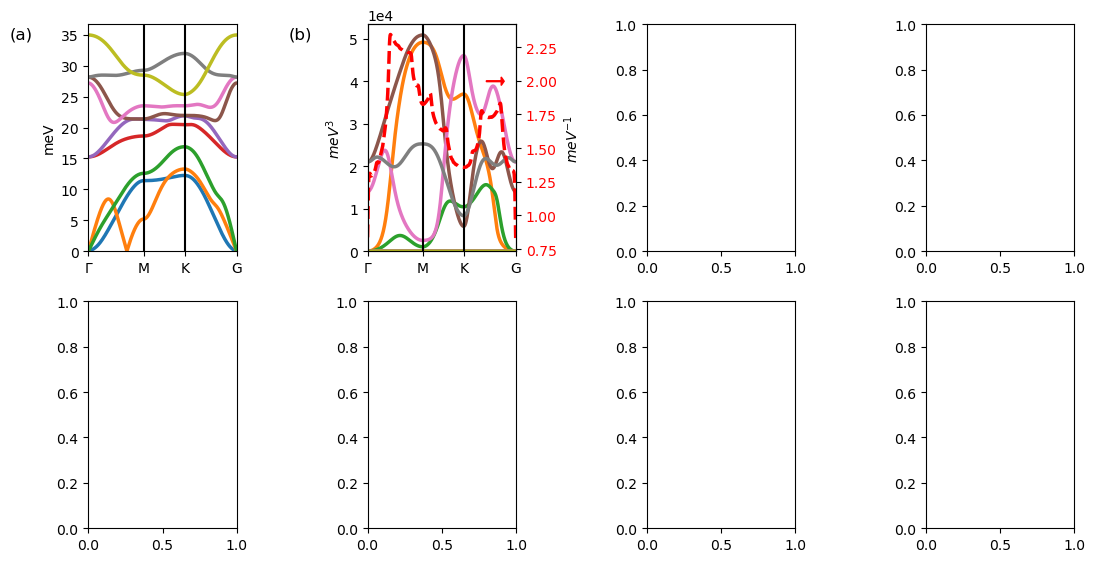

In [236]:
#Untangled band
# fig = plt.figure(figsize=(4,8))
fig, axs = plt.subplots(2, 4,figsize=(12,7))
fig.tight_layout(pad=6,h_pad=1.5)


for i in range(nph):
    axs[0][0].plot(epw.ph[i],label=i,linewidth=2.5)
axs[0][0].set_xlim(0,nq)
axs[0][0].set_ylim(0)
axs[0][0].set_xticks(sym,["Γ","M","K","G"])
axs[0][0].set_ylabel(r"meV")
for i in sym[1:-1]:
    axs[0][0].axvline(i,c='black')
# axs[0][0].set_title(r"$\Omega$")
axs[0][0].set_title('(a)', x=-0.45,y=0.9)



axt = axs[0][1].twinx()
axt.set_ylabel(r"$meV^{-1}$")
axt.tick_params(axis='y', labelcolor='r')
axt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axt.plot(gaussian_filter1d(-q_res.real,2),c='r',linewidth=2.5,linestyle="--")

for i in range(nph):
    axs[0][1].plot(g0_mean[i].real,linewidth=2.5)

axs[0][1].arrow(400, 4*10**4, 50, 0, width = 0.02* 10**4,head_length=10,head_width =0.2* 10**4,color='red')
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
axs[0][1].set_xlim(0,nq)
axs[0][1].set_ylabel(r"${meV}^{3}$")
axs[0][1].set_xticks(sym,["Γ","M","K","G"])
# axs[0][3].set_title(r"$G, \chi$")
axs[0][1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0][1].set_ylim(0)
axs[0][1].set_title('(b)', x=-0.45,y=0.9)
for i in sym[1:-1]:
    axs[0][1].axvline(i,c='black')




# for i in range(nph):
#     axs[0][2].plot(gaussian_filter1d(suscep_val.astype("float32"),30)*gaussian_filter1d(reduced_removed_fixed_g_complex_mean[i].real,30),linewidth=2.5)
# # plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
#     # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
# axs[0][2].set_xlim(0,nq)
# axs[0][2].set_ylabel(r"${meV}^{2}$")
# axs[0][2].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# # axs[0][2].set_title(r"$G\cdot \chi$")
# axs[0][2].axvline(nq*2/3,c='black',linestyle="--")
# axs[0][2].set_ylim(0)
# axs[0][2].axvline(1394,c='black')
# axs[0][2].set_title('(c)', x=-0.45,y=0.9)




# for i in range(nph):
#     axs[0][3].plot(gaussian_filter1d(selfen_matrix[i][i].real.astype("float32"),30),linewidth=2.5)
# # plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
#     # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
# axs[0][3].set_xlim(0,nq)
# axs[0][3].set_ylabel(r"${meV}^{2}$")
# axs[0][3].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# # axs[1][0].set_title(r"$\Pi^{\prime}_{\lambda\lambda^{\prime}}$")
# axs[0][3].axvline(nq*2/3,c='black',linestyle="--")
# axs[0][3].axvline(1394,c='black')
# axs[0][3].set_ylim(0)
# axs[0][3].set_title('(d)', x=-0.45,y=0.9)


# for i in range(nph):
#     axs[1][0].plot(gaussian_filter1d(abs(selfen_matrix[0][i].real),30),linewidth=2.5)
# # plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
#     # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
# axs[1][0].set_xlim(0,nq)
# axs[1][0].set_ylabel(r"${meV}^{2}$")
# axs[1][0].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# # axs[1][1].set_title(r"$Re(\Pi^{\prime}_{0\lambda^{\prime}})$")
# axs[1][0].axvline(nq*2/3,c='black',linestyle="--")
# axs[1][0].axvline(1394,c='black')
# axs[1][0].set_ylim(0)
# axs[1][0].set_title('(e)', x=-0.45,y=0.9)

# for i in range(nph):
#     axs[1][1].plot(gaussian_filter1d(abs(selfen_matrix[0][i].imag),30),linewidth=2.5)
# # plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
#     # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
# axs[1][1].set_xlim(0,nq)
# axs[1][1].set_ylabel(r"${meV}^{2}$")
# axs[1][1].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# # axs[1][2].set_title(r"$Im(\Pi^{\prime}_{0\lambda^{\prime}})$")
# axs[1][1].axvline(nq*2/3,c='black',linestyle="--")
# axs[1][1].axvline(1394,c='black')
# axs[1][1].set_ylim(0)
# axs[1][1].set_title('(f)', x=-0.45,y=0.9)


# axs[1][2].axvline(1394,c='black')
# for i in range(nph):
#     axs[1][2].plot(1/fixed_ph[i],label=i,linewidth=2.5)
# axs[1][2].set_xlim(0,nq)
# axs[1][2].set_ylim(0,8)
# axs[1][2].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# axs[1][2].set_ylabel(r"${meV}^-1$")
# # axs[0][1].set_title(r"${\Omega}^{-1}$")
# axs[1][2].axvline(nq*2/3,c='black',linestyle="--")
# axs[1][2].set_ylim(0)
# axs[1][2].set_title('(g)', x=-0.45,y=0.9)



# for i in range(nph):
#     axs[1][3].plot(gaussian_filter1d(epw_selfen_matrix[i][i].real,10),linewidth=2.5)
# # plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
#     # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
# axs[1][3].set_xlim(0,nq)
# axs[1][3].set_ylabel(r"${meV}$")
# axs[1][3].set_xticks([0,nq*2/3,nq],["Γ","2/3M","M"])
# # axs[1][3].set_title(r"$\Pi_{\lambda\lambda^{\prime}}$")
# axs[1][3].axvline(nq*2/3,c='black',linestyle="--")
# axs[1][3].axvline(1394,c='black')
# axs[1][3].set_ylim(0)
# axs[1][3].set_title('(h)', x=-0.45,y=0.9)



    # plt.plot(abs(selfen_matrix[0][i].real),label=i)
# plt.title(r"$1/\Omega$")
# plt.savefig("./output/figure.jpg",bbox_inches='tight')
plt.show()

In [229]:
%%time
q_res = np.zeros(nq,dtype=complex)
for i in range(nq):
    q_res[i]=np.mean((typy.fd(epw.e_k[i]-epw.ef,T=1)-typy.fd(epw.e_kq[i]-epw.ef,T=1))/(epw.e_k[i]-epw.e_kq[i]-1j*1e-8))

CPU times: user 17.6 s, sys: 348 ms, total: 17.9 s
Wall time: 17.9 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


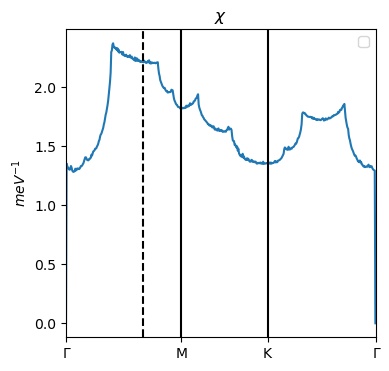

In [231]:
rrr = -q_res.real
fig = plt.figure(figsize=(4,4))
# for i in np.linspace(0,0.42,20):
    # plt.plot(rrr/(1-i*rrr),label=round(i,2))
plt.plot(-q_res.real)
plt.xlim(0,nq)
# plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{-1}$")
plt.title(r"$\chi$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.axvline(sym[1]*2/3,c='black',linestyle="--")
plt.legend()
# plt.savefig("./output/X.jpg",bbox_inches='tight')
# plt.savefig('outdata/1001_GMKG/chi.png',bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

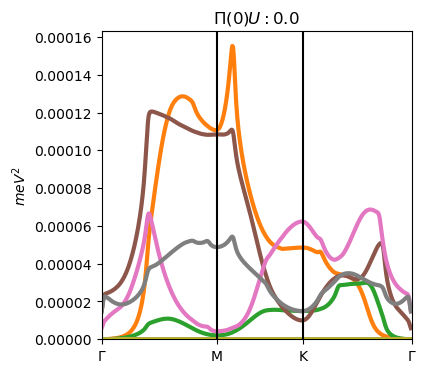

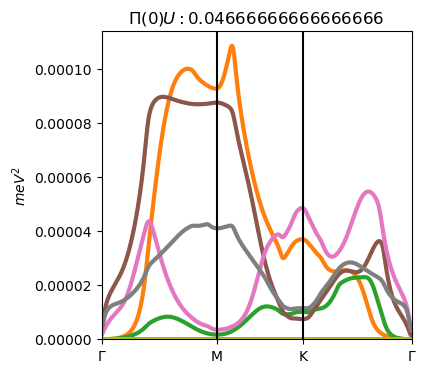

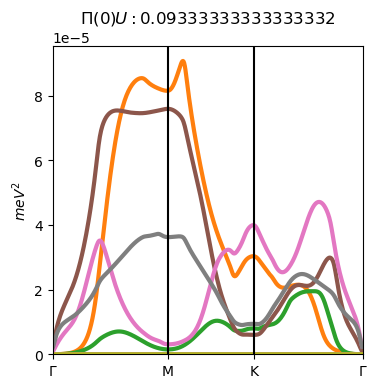

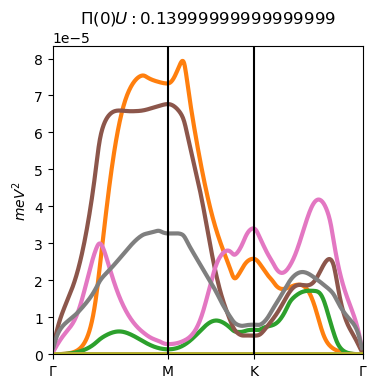

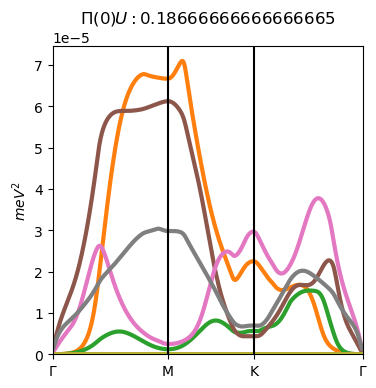

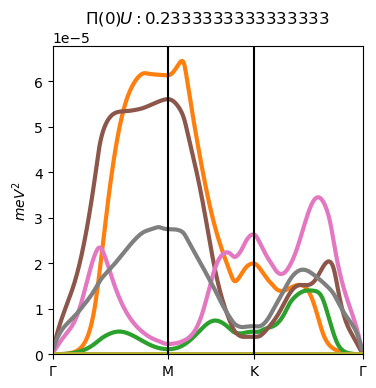

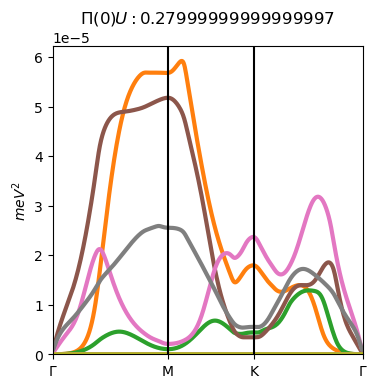

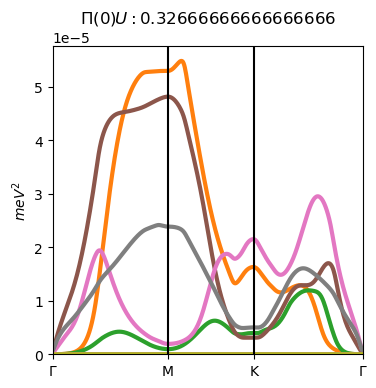

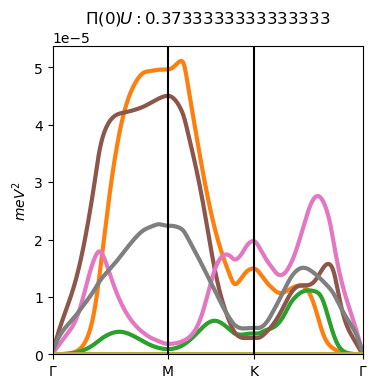

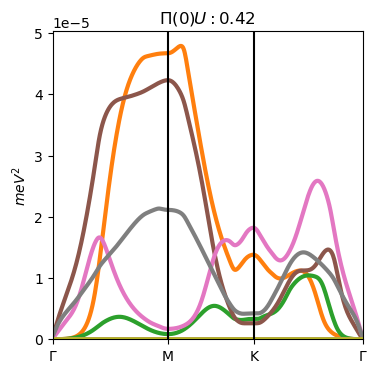

In [53]:
for U in np.linspace(0,0.42,10):
    gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=0,nph=nph,nq=nq,nk=nk,U=U)
    res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))
    filter_self = gaussian_filter1d(-np.array(res).T.real,2)
    fig = plt.figure(figsize=(4,4))
    for i in range(nph):
        plt.plot(filter_self[i],lw=3)
    plt.xlim(0,nq)
    plt.ylim(0)
    plt.xticks(sym,["Γ","M","K","Γ"])
    plt.ylabel(r"$meV^{2}$")
    plt.title(f"$\Pi(0) U:{U}$")
    for i in sym[1:-1]:
        plt.axvline(i,c='black')
    plt.show()


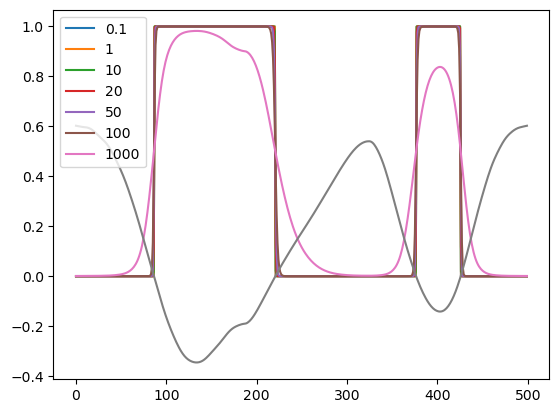

In [100]:
for i in [0.1,1,10,20,50,100,1000]:
    plt.plot(typy.fd(epw.e_kq.T[0]-epw.ef,T=i),label=i)
plt.plot(epw.e_kq.T[0]-ef)
plt.legend()

In [51]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=epw.ph,nph=nph,nq=nq,nk=nk)

In [80]:
(epw.e_k[0]-epw.ef)*10**3

array([602.50873, 601.9709 , 601.38851, ..., 603.59943, 603.39973,
       603.07411])

In [82]:
(epw.e_kq[1]-epw.ef)*10**3

array([601.77419, 601.18259, 600.58131, ..., 603.30085, 602.93686,
       602.4774 ])

In [ ]:
0.6 ev 6 dev 60 cev 600 mev

In [76]:
epw.ph[0]

array([1.62132700e-06, 1.67808482e-02, 3.36725922e-02, 5.07688393e-02,
       6.81700568e-02, 8.59746597e-02, 1.04278421e-01, 1.23173949e-01,
       1.42750250e-01, 1.63092358e-01, 1.84281057e-01, 2.06392669e-01,
       2.29498904e-01, 2.53666776e-01, 2.78958558e-01, 3.05431777e-01,
       3.33139235e-01, 3.62129052e-01, 3.92444731e-01, 4.24125218e-01,
       4.57204988e-01, 4.91714121e-01, 5.27678389e-01, 5.65119349e-01,
       6.04054430e-01, 6.44497036e-01, 6.86456644e-01, 7.29938910e-01,
       7.74945783e-01, 8.21475625e-01, 8.69523336e-01, 9.19080486e-01,
       9.70135458e-01, 1.02267359e+00, 1.07667735e+00, 1.13212647e+00,
       1.18899814e+00, 1.24726715e+00, 1.30690612e+00, 1.36788564e+00,
       1.43017449e+00, 1.49373979e+00, 1.55854725e+00, 1.62456131e+00,
       1.69174535e+00, 1.76006189e+00, 1.82947280e+00, 1.89993942e+00,
       1.97142280e+00, 2.04388385e+00, 2.11728352e+00, 2.19158295e+00,
       2.26674362e+00, 2.34272752e+00, 2.41949726e+00, 2.49701619e+00,
      

In [56]:
%%time
suscep_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_suscep)(i) for i in range(nq))

CPU times: user 5.16 s, sys: 47.1 s, total: 52.2 s
Wall time: 56.5 s


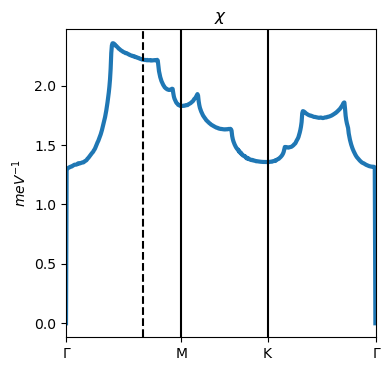

In [57]:
fig = plt.figure(figsize=(4,4))
plt.plot( -np.array(suscep_res).real,lw=3)
plt.xlim(0,nq)
# plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{-1}$")
plt.title(r"$\chi$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.axvline(sym[1]*2/3,c='black',linestyle="--")

# plt.savefig("./output/X.jpg",bbox_inches='tight')
# plt.savefig('outdata/1001_GMKG/chi.png',bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

In [45]:
# %%time
test_val = [0.001,0.01,0.1,1,2,5,10,20,50,100]
t_array=np.zeros(shape=(len(t_val),nq))
for j,i in enumerate(t_val):
    gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=epw.ph,nph=nph,nq=nq,nk=nk,T=i)
    temp_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_suscep)(i) for i in range(nq))
    t_array[j] = -np.array(temp_res).real
    print(f"{j}/{len(t_val)}")

In [46]:
# fig = plt.figure(figsize=(4,4))
# for i in t_array:
#     plt.plot(i,lw=1)
# plt.xlim(0,nq)
# # plt.ylim(0)
# plt.xticks(sym,["Γ","M","K","Γ"])
# plt.ylabel(r"$meV^{-1}$")
# plt.title(r"$\chi$")
# for i in sym[1:-1]:
#     plt.axvline(i,c='black')
# plt.axvline(sym[1]*2/3,c='black',linestyle="--")

# # plt.savefig("./output/X.jpg",bbox_inches='tight')
# # plt.savefig('outdata/1001_GMKG/chi.png',bbox_inches='tight')

# # plt.savefig("./output/chi.jpg",bbox_inches='tight')
# plt.show()

In [47]:
# %%time
# # suscep_search = np.arange(-0.005,0.005,0.0001)
# suscep_search = np.linspace(-0.1,0.1,3,end=True)
# suscep_array=np.zeros(shape=(len(suscep_search),nq))
# for j,i in enumerate(suscep_search):
#     gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef-i,ph=epw.ph,nph=nph,nq=nq,nk=nk,T=10)
#     temp_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_suscep)(i) for i in range(nq))
#     suscep_array[j] = -np.array(temp_res).real
#     print(f"{j}/{len(suscep_search)}")

0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


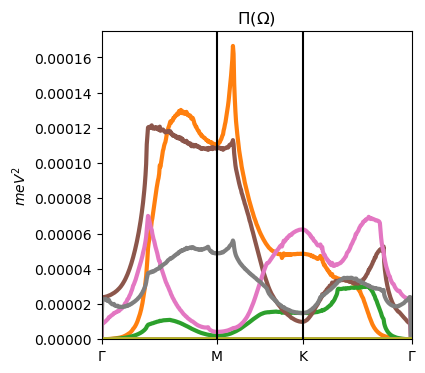

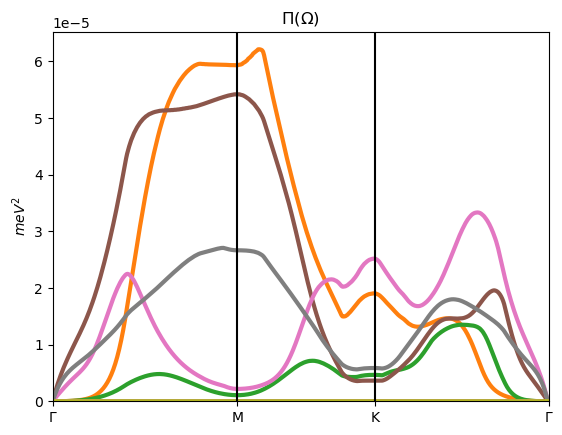

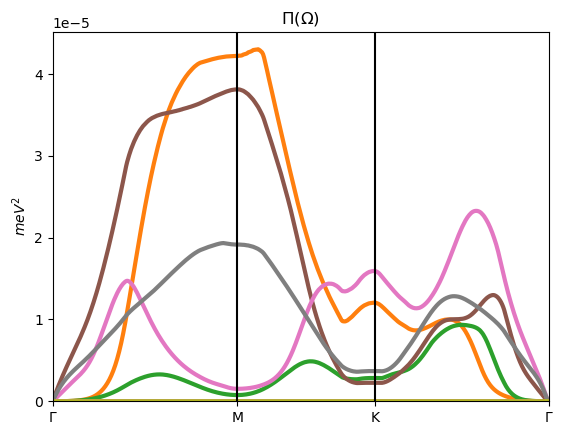

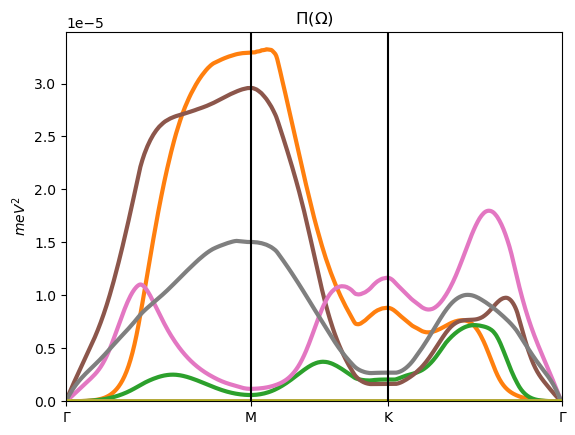

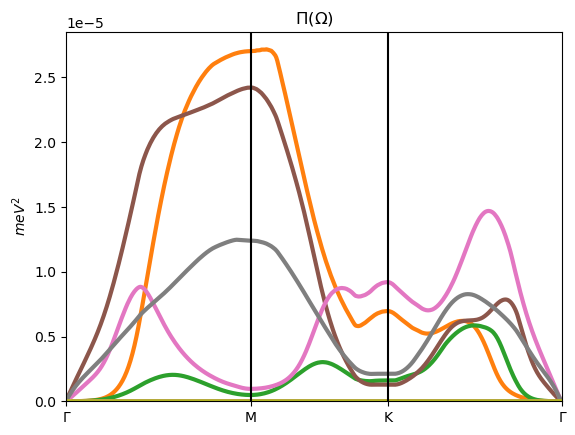

In [153]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for j in res_array:
    for i in range(nph):
    # plt.plot(-np.array(selfen_res).T[i].real)
        plt.plot(j[i],lw=3)
    plt.xlim(0,nq)
    plt.ylim(0)
    plt.xticks(sym,["Γ","M","K","Γ"])
    plt.ylabel(r"$meV^{2}$")
    plt.title(r"$\Pi(\Omega)$")
    for i in sym[1:-1]:
        plt.axvline(i,c='black')
# plt.savefig('outdata/1001_GMKG/pi_omega.png',bbox_inches='tight')

    plt.show()

In [49]:
# fig = plt.figure(figsize=(4,4))
# for i in suscep_array:
#     plt.plot(i,lw=1)
# plt.xlim(0,nq)
# # plt.ylim(0)
# plt.xticks(sym,["Γ","M","K","Γ"])
# plt.ylabel(r"$meV^{-1}$")
# plt.title(r"$\chi$")
# for i in sym[1:-1]:
#     plt.axvline(i,c='black')
# plt.axvline(sym[1]*2/3,c='black',linestyle="--")

# # plt.savefig("./output/X.jpg",bbox_inches='tight')
# # plt.savefig('outdata/1001_GMKG/chi.png',bbox_inches='tight')

# # plt.savefig("./output/chi.jpg",bbox_inches='tight')
# plt.show()

In [ ]:
%%time
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=epw.ph,nph=nph,nq=nq,nk=nk,T=1)
selfen_res = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))


In [ ]:
filter_selfen = gaussian_filter1d(-np.array(selfen_res).T.real,2)

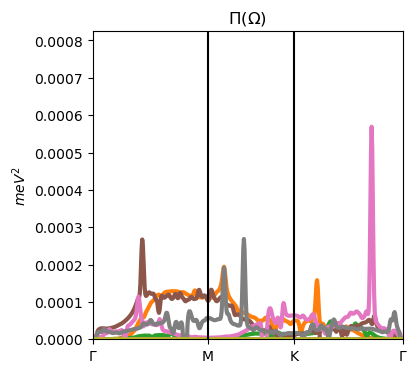

In [38]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    # plt.plot(-np.array(selfen_res).T[i].real)
    plt.plot(filter_selfen[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\Omega)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
# plt.savefig('outdata/1001_GMKG/pi_omega.png',bbox_inches='tight')

plt.show()

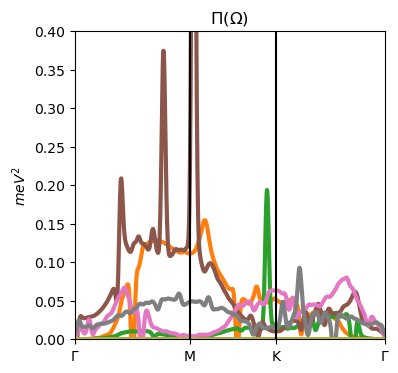

In [160]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    # plt.plot(-np.array(selfen_res).T[i].real)
    plt.plot(filter_selfen[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0,0.4)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\Omega)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.savefig('outdata/1001_GMKG/pi_omega.png',bbox_inches='tight')

plt.show()

In [54]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=epw.g0,ef=ef,ph=0,nph=nph,nq=nq,nk=nk)

In [55]:
%%time
selfen_res0 = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))

CPU times: user 6.59 s, sys: 15.1 s, total: 21.7 s
Wall time: 29.5 s


In [56]:
filter_self0 = gaussian_filter1d(-np.array(selfen_res0).T.real,4)

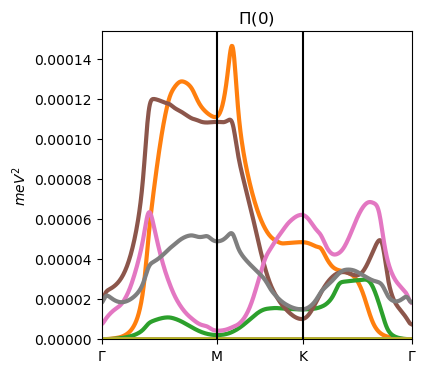

In [57]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    plt.plot(filter_self0[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')

# plt.savefig('outdata/1001_GMKG/pi_0.png',bbox_inches='tight')

# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

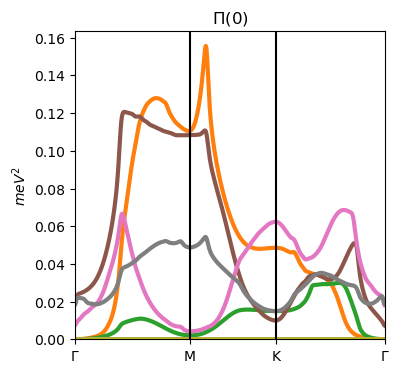

In [154]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    plt.plot(filter_self0[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')

plt.savefig('outdata/1001_GMKG/pi_0.png',bbox_inches='tight')

# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

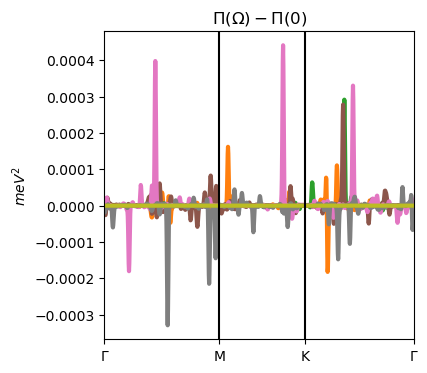

In [108]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    plt.plot(filter_selfen[i]-filter_self0[i],lw=3)
plt.xlim(0,nq)
# plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV^{2}$")
plt.title(r"$\Pi(\Omega)-\Pi(0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')

# plt.savefig('outdata/1001_GMKG/pi_omega-0.png',bbox_inches='tight')

# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

In [78]:
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=fixed_g_complex,ef=ef,ph=epw.ph,nph=nph,nq=nq,nk=nk)

In [79]:
%%time
selfen_res1 = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))

CPU times: user 2.44 s, sys: 3.13 s, total: 5.57 s
Wall time: 4min 40s


In [180]:
selfen_g0_omega = gaussian_filter1d(-np.array(selfen_res1).T.real,8)

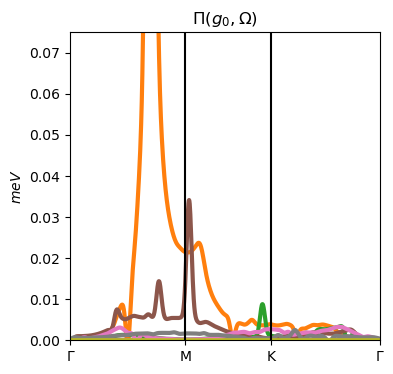

In [182]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    plt.plot(selfen_g0_omega[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0,0.075)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV$")
plt.title(r"$\Pi(g_0,\Omega)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.savefig('outdata/1001_GMKG/pi_g0_omega.png',bbox_inches='tight')

# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

In [169]:
%%time
gkk_model = gkk(e_k=epw.e_k,e_kq=epw.e_kq,g=fixed_g_complex,ef=ef,ph=np.zeros(shape=(nph,nq)),nph=nph,nq=nq,nk=nk)
selfen_g0 = Parallel(n_jobs=num_cores)(delayed(gkk_model.calculate_selfen)(i) for i in range(nq))

CPU times: user 2.8 s, sys: 18.8 s, total: 21.6 s
Wall time: 4min 58s


In [174]:
filter_selfen_g0 = gaussian_filter1d(-np.array(selfen_g0).T.real,2)

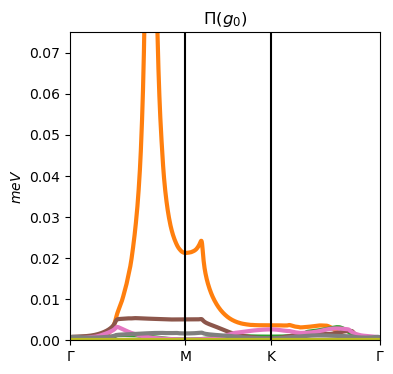

In [184]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    plt.plot(filter_selfen_g0[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0,0.075)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV$")
plt.title(r"$\Pi(g_0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.savefig('outdata/1001_GMKG/pi_g0.png',bbox_inches='tight')

# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

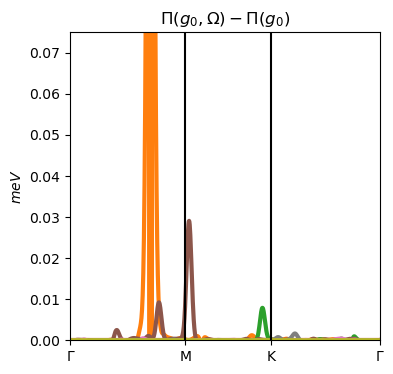

In [185]:
fig = plt.figure(figsize=(4,4))
# plt.plot(filtered_suscep,c='r')
for i in range(nph):
    plt.plot(selfen_g0_omega[i]-filter_selfen_g0[i],lw=3)
plt.xlim(0,nq)
plt.ylim(0,0.075)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"$meV$")
plt.title(r"$\Pi(g_0,\Omega)-\Pi(g_0)$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.savefig('outdata/1001_GMKG/pi_g0-omega.png',bbox_inches='tight')

# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

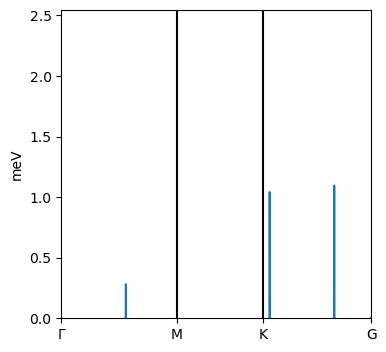

In [89]:
#Untangled band
fig = plt.figure(figsize=(4,4))
for i in range(1):
    plt.plot(np.array(suscep_res).T[0].real,label=i)
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","G"])
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylabel(r"meV")
# plt.legend()
# plt.title(r"$\Omega$")
plt.show()

In [76]:
np.array(suscep_res).T

array([[ 0.        +0.00000000e+00j, -1.4730175 +1.48881687e-06j,
        -1.28962496-2.98881490e-06j, ..., -1.36639107-7.11707622e-06j,
        -1.46829748-5.77557638e-06j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j, -1.49562204-7.03631500e-05j,
        -1.29312996-4.66509029e-05j, ..., -1.36426963-5.99764776e-06j,
        -1.47911601-1.66077752e-05j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j, -2.7792929 -3.80887796e-01j,
        -1.38770842-1.43327312e-02j, ..., -1.37639349-1.05235814e-05j,
        -1.50203302-3.95362961e-05j,  0.        +0.00000000e+00j],
       ...,
       [ 0.        +0.00000000e+00j,  0.14701309-9.92054107e-07j,
         0.80322306-2.05725923e-05j, ...,  3.10411385-3.73787190e-03j,
         0.18310003-1.31544686e-06j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.09464137-4.54233636e-07j,
         0.31008052-2.38023791e-06j, ...,  2.76962553-2.56188923e-03j,
         0.18306411-1.31499592e-06j

In [63]:
class susceptibility:
    def __init__(self, e_k,e_kq,ef,delta,phonon=False):
        self.e_k = e_k
        self.e_kq = e_kq
        self.ef = ef
        self.delta = delta
        self.nk = e_k.shape[1]
        if (phonon):
            self.ph = phonon
            self.nq = len(phonon)
    def calculate(self,q):
        temp_sum=0
        for k in range(self.nk):
            temp_sum+= (typy.fd(self.e_k[q][k]-self.ef)-typy.fd(self.e_kq[q][k]-self.ef))/(self.e_k[q][k]-self.e_kq[q][k]+1j*self.delta)
        return  -temp_sum/nk*10**-3
    def factor(self,q):
        temp_sum=0
        k_array = np.zeros(self.nk, dtype=complex)
        for k in range(self.nk):
            k_array[k] = (typy.fd(self.e_k[q][k]-self.ef)-typy.fd(self.e_kq[q][k]-self.ef))/(self.e_k[q][k]-self.e_kq[q][k]+1j*self.delta)
        return  -k_array*10**-3
    def adiabatic_factor(self,q):
            temp_sum=0
            k_array = np.zeros(shape=(self.nq,self.nk), dtype=complex)
            for i in range(self.nq):
                for k in range(self.nk):
                    k_array[i][k] = (typy.fd(self.e_k[q][k]-self.ef)-typy.fd(self.e_kq[q][k]-self.ef))/(self.e_k[q][k]-self.e_kq[q][k]+1j*self.delta+self.ph[i][q])
            return  -k_array*10**-3

In [64]:
prep_suscep = susceptibility(e_k,e_kq,ef,delta)

In [65]:
%%time
suscep_results = Parallel(n_jobs=num_cores)(delayed(prep_suscep.calculate)(i) for i in range(nq))

CPU times: user 1.2 s, sys: 11.3 s, total: 12.5 s
Wall time: 35.1 s


In [66]:
%%time
factor_results = Parallel(n_jobs=num_cores)(delayed(prep_suscep.factor)(i) for i in range(nq))

CPU times: user 1.49 s, sys: 1.11 s, total: 2.6 s
Wall time: 21 s


In [67]:
suscep_val = np.array(suscep_results).real

In [68]:
from scipy.ndimage import gaussian_filter1d

In [69]:
filtered_suscep = gaussian_filter1d(suscep_val.astype("float32"),10)

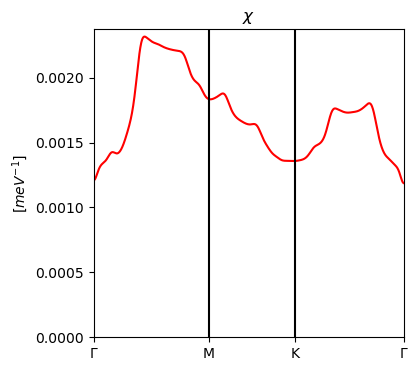

In [90]:
fig = plt.figure(figsize=(4,4))
plt.plot(filtered_suscep,c='r')
plt.xlim(0,nq)
plt.ylim(0)
plt.xticks(sym,["Γ","M","K","Γ"])
plt.ylabel(r"[$meV^{-1}$]")
plt.title(r"$\chi$")
for i in sym[1:-1]:
    plt.axvline(i,c='black')
# plt.savefig("./output/X.jpg",bbox_inches='tight')

# plt.savefig("./output/chi.jpg",bbox_inches='tight')
plt.show()

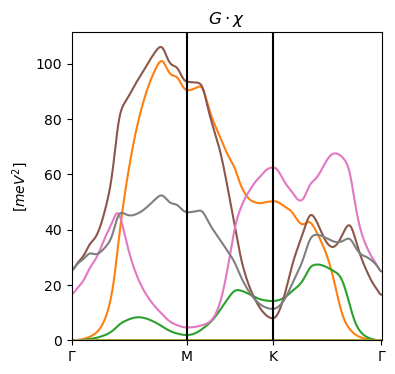

In [71]:
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    plt.plot(filtered_suscep*reduced_fixed_g_complex_mean[i].real)

plt.title(r"$G\cdot \chi$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')
plt.xlim(0,nq)
plt.ylim(0)
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylabel(r"$[{meV}^{2}]$")
plt.xticks(sym,["Γ","M","K","Γ"])
# plt.axvline(nq*2/3,c='black',linestyle="--")
# plt.axhline(0,c='black',linestyle="--")
# plt.savefig("./output/GX.jpg",bbox_inches='tight')



# plt.legend()
plt.show()

In [72]:
filtered_suscep.shape

(1002,)

In [73]:
reduced_fixed_g_complex_mean.shape

(9, 1002)

In [74]:
with open("./output/G_Chi.dat", 'a') as file:
    for i in range(nph):
        for q in range(nq):
            file.write(f"{q} {i} {filtered_suscep[q]*reduced_fixed_g_complex_mean[i][q].real} \n")

In [75]:
!pwd

/work/bansil/s.sevim/Work/typy


In [77]:
class selfenergy:
    def __init__(self, g_complex,factor,sum_array):
        self.g_complex = g_complex
        self.g_conj = g_complex.conj()
        self.nph = g_complex.shape[0]
        self.nq = g_complex.shape[1]
        self.nk = g_complex.shape[2]
        self.factor = factor
        self.sum_array = sum_array
    def sum_over_k(self,index):
        i,j,q = self.sum_array[index]
        temp_sum=0
        for k in range(self.nk):
            epc = (self.g_complex[i][q][k]*self.g_conj[j][q][k])
            temp_sum+=epc* self.factor[q][k]
        return temp_sum/self.nk    

In [78]:
sum_array = []
for i in range(nph):
    for j in range(nph):
        if i<=j:
        # if i==j:
            for q in range(nq):
                sum_array.append([i,j,q])

In [79]:
prep_selfen = selfenergy(reduced_fixed_g_complex,factor_results,sum_array)

In [ ]:
%%time
results = Parallel(n_jobs=num_cores)(
            delayed(prep_selfen.sum_over_k)(i) for i in range(len(sum_array)))

In [ ]:
selfen_matrix = np.zeros(shape=(nph,nph,nq),dtype=complex)

In [ ]:
for i in range(len(sum_array)):
    mu,nu,q = sum_array[i]
    selfen_matrix[mu][nu][q]=results[i]

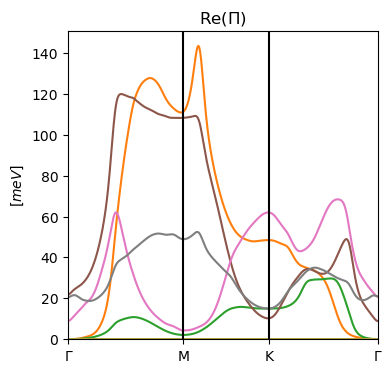

In [87]:
fig = plt.figure(figsize=(4,4))
for i in range(nph):
    # plt.plot(selfen_matrix[i][i].real,label=i)
    plt.plot(gaussian_filter1d(selfen_matrix[i][i].real.astype("float32"),10))
plt.xlim(0,nq)
# plt.xticks([0,nq*2/3,nq],["G","2/3M","M"])
# plt.axvline(nq*2/3,c='black',linestyle="--")
# plt.axhline(0,c='black',linestyle="--")
plt.xlim(0,nq)
plt.ylim(0)
for i in sym[1:-1]:
    plt.axvline(i,c='black')
plt.ylabel(r"$[{meV}^{2}]$")
plt.xticks(sym,["Γ","M","K","Γ"])
plt.title(r"Re($\Pi$)")
# plt.legend()
plt.ylabel(r"[$meV$]")
# plt.savefig("./output/Re.jpg",bbox_inches='tight')

# plt.title(r"g")
# plt.savefig("./output/re_pi_g.jpg",bbox_inches='tight')
plt.show()

In [79]:
selfen_matrix.shape

(9, 9, 1002)

In [80]:
selfen_matrix[2][1]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [86]:
pwd

'/work/bansil/s.sevim/Work/typy'

In [87]:
with open("./output/selfen.dat", 'a') as file:
    for i in range(nph):
        for j in range(nph):
            if i<=j:
                for q in range(nq):
                    file.write(f"{q} {i} {j} {selfen_matrix[i][j][q].real} {selfen_matrix[i][j][q].imag} \n")

In [89]:
with open("./output/phonon.dat", 'a') as file:
    for i in range(nph):
        for q in range(nq):
            file.write(f"{q} {i} {fixed_ph[i][q]} \n")

In [90]:
sym

array([   0,  372,  650, 1001])

In [38]:
# for i in range(nph):
#     for j in range(nph):
#         if i<=j:
#             for q in range(nq):
#                 print(f"{q} {i} {j} {selfen_matrix[i][j][q].real} {selfen_matrix[i][j][q].imag}")

In [ ]:
npoint = 

In [ ]:
typy.path_create()